In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
    "rec.sport.hockey",
    "soc.religion.christian"
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42,
)

org_data = []
labels = []

indices = np.arange(len(dataset.target))
np.random.shuffle(indices)
org_data = np.array(dataset.data)[indices[:300]]
labels = dataset.target[indices[:300]]
# for i in range(len(categories)):
#     indices = np.where(dataset.target == i)[0]
#     np.random.shuffle(indices)
#     indices = indices[:140]
#     org_data.extend(np.array(dataset.data)[indices])
#     labels.extend(dataset.target[indices])
    

org_data = np.array(org_data)
labels = np.array(labels)
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(org_data)} documents - {true_k} categories")

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


300 documents - 6 categories


In [2]:
org_data[4]

'Our Lord and Savior David Keresh has risen!\n\n\n\tHe has been seen alive!\n\n\n\tSpread the word!\n\n\n\n\n--------------------------------------------------------------------------------'

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=4,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(org_data)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.075 s
n_samples: 300, n_features: 1266


In [32]:
data = np.array(X_tfidf.todense())
n_samples, n_features = data.shape

In [33]:
n_samples, n_features

(300, 1266)

Text(0.5, 0, 'features')

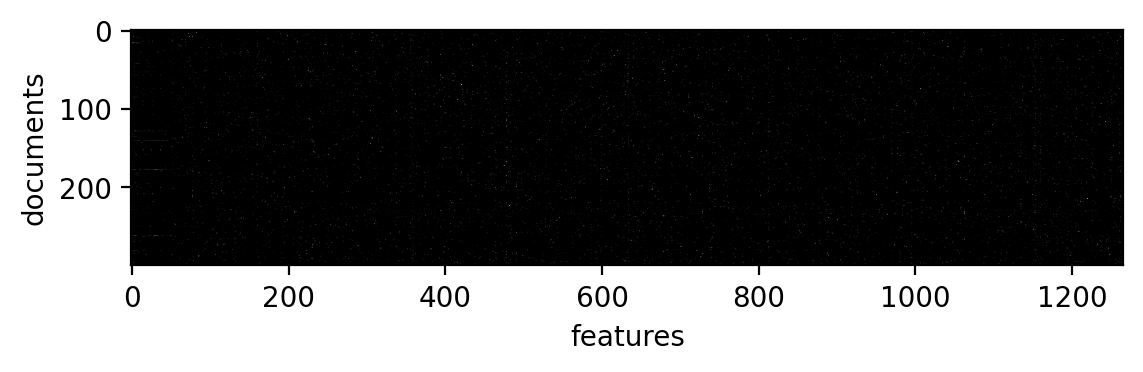

In [92]:
plt.figure(dpi = 200)
plt.imshow(data, cmap = "gray")
plt.ylabel("documents")
plt.xlabel("features")

In [202]:
def row_normalization(data: np.array) -> np.array:
    row_average = data.mean(axis = 0)[None, :]
    centered_data = data - row_average
    normalized_length = centered_data / np.linalg.norm(centered_data, axis=1)[:, None]
    return normalized_length

def column_normalization(data: np.array) -> np.array:
    column_average = data.mean(axis = 1)[:, None]
    centered_data = data - column_average
    normalized_length = centered_data / np.linalg.norm(centered_data, axis = 0)[None, :]
    return normalized_length

    
def ISA(data: np.array, n_initial: int = 1000, n_updates = 1000, thresh = 1):

    def W(x: np.array) -> np.array:
        return x

    def threshold(x: np.array, t: int) -> np.array:
        s = np.std(x)
        new_x = (x - np.mean(x))/(s if (s!=0 and not np.isinf(s)) else 1)
        return (new_x > t).astype(int)
    
    def f(x: np.array, t: int) -> np.array:
        return W(x) * threshold(x = x, t = t)


    n_samples, n_features = data.shape
    
    r_data = row_normalization(data)
    c_data = column_normalization(data)

    feature_vector = np.zeros((n_features))
    sample_vector = np.zeros((n_samples))
    
    for _ in range(n_initial):
        seed = np.random.binomial(n = 1, p = 0.5, size = n_features)
        feature_vector = seed
        for i in range(n_updates):
            sample_vector = f(r_data.dot(feature_vector), t = thresh)
            feature_vector = f(c_data.T.dot(sample_vector), t = thresh)

    return sample_vector, feature_vector
            
            
            
        

In [203]:
sample_vec, feature_vec = ISA(data, n_initial=1, n_updates=20)

In [195]:
np.outer(sample_vec, feature_vec).shape

(300, 1266)

Text(0.5, 0, 'features')

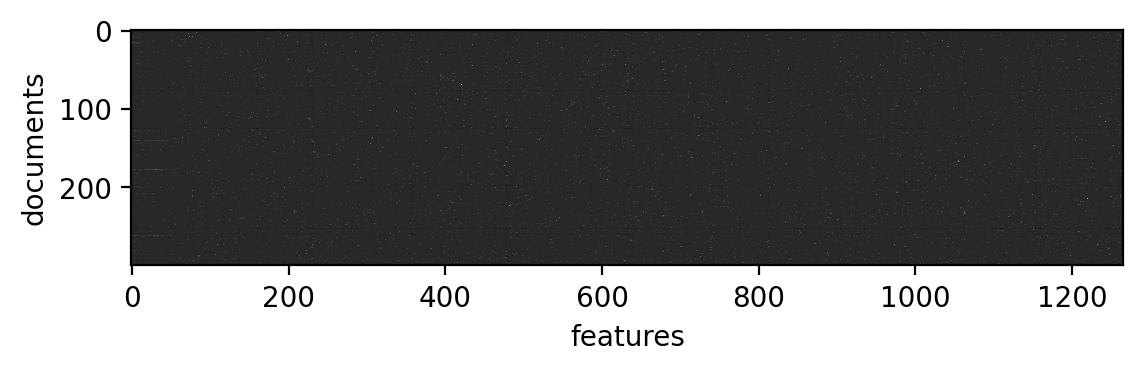

In [184]:
plt.figure(dpi = 200)
plt.imshow(row_normalization(data), cmap = "gray")
plt.ylabel("documents")
plt.xlabel("features")

Text(0.5, 0, 'features')

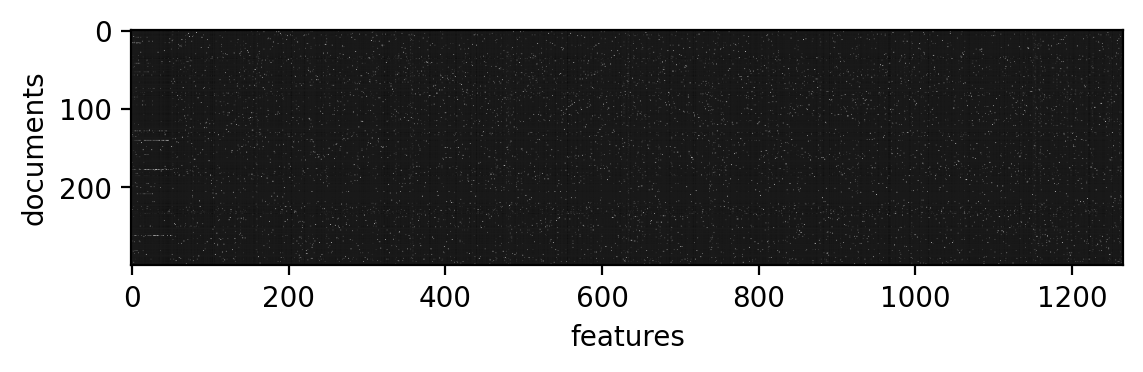

In [185]:
plt.figure(dpi = 200)
plt.imshow(column_normalization(data), cmap = "gray")
plt.ylabel("documents")
plt.xlabel("features")

Text(0.5, 0, 'features')

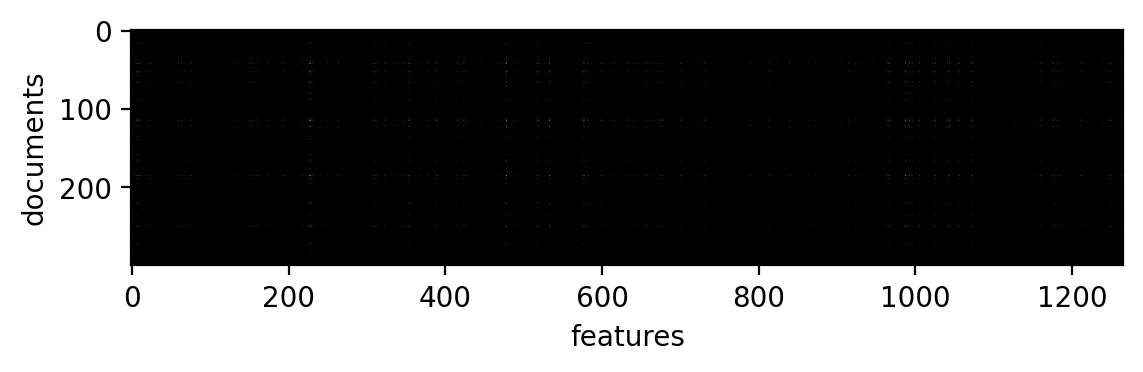

In [186]:
plt.figure(dpi = 200)
plt.imshow(np.outer(sample_vec, feature_vec), cmap = "gray")
plt.ylabel("documents")
plt.xlabel("features")

In [204]:
from collections import Counter
labels[np.where(sample_vec>0)]

array([4, 4, 4, 4, 0, 4, 4, 4, 4, 5, 4, 4, 0, 4, 4, 4, 4, 4, 5, 4])

In [210]:
Counter(labels[np.where(sample_vec>0)])

Counter({4: 16, 0: 2, 5: 2})

In [205]:
np.where(feature_vec>0)

(array([   6,    7,    9,   10,   11,   12,   22,   24,   60,   63,   64,
          67,   76,   83,  132,  151,  155,  156,  161,  173,  193,  194,
         204,  218,  225,  227,  228,  229,  232,  249,  264,  295,  308,
         309,  311,  313,  323,  337,  347,  353,  355,  367,  379,  389,
         390,  416,  424,  429,  445,  466,  472,  478,  488,  518,  519,
         520,  533,  541,  550,  551,  577,  582,  589,  596,  600,  602,
         610,  623,  632,  640,  642,  644,  656,  660,  666,  675,  701,
         725,  730,  732,  789,  812,  839,  863,  872,  914,  923,  929,
         964,  966,  967,  986,  987,  992,  996, 1004, 1005, 1022, 1025,
        1041, 1043, 1055, 1064, 1072, 1077, 1122, 1127, 1148, 1157, 1159,
        1160, 1175, 1182, 1184, 1211, 1212, 1240, 1247, 1249, 1250, 1257,
        1262]),)

In [201]:
vectorizer.get_feature_names_out()[np.where(feature_vec>0)]

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '24', '25', '26', '28', 'according', 'act', 'action', 'acts',
       'actually', 'adam', 'age', 'agree', 'alive', 'answer', 'appears',
       'ask', 'authority', 'away', 'basis', 'begin', 'beginning',
       'believe', 'believed', 'bible', 'biblical', 'body', 'books',
       'born', 'bring', 'called', 'came', 'carrying', 'case', 'change',
       'changed', 'child', 'children', 'chosen', 'christ', 'christian',
       'christians', 'church', 'clearly', 'come', 'coming', 'committed',
       'concept', 'corinthians', 'covered', 'created', 'creation', 'day',
       'days', 'dead', 'death', 'delivered', 'did', 'die', 'different',
       'disagree', 'disciples', 'discussed', 'divine', 'doctrine', 'does',
       'doesn', 'don', 'earth', 'easter', 'end', 'eternal', 'eternity',
       'evidence', 'fact', 'faith', 'father', 'feel', 'finally',
       'following', 'fully', 'gave', 'genesis', 'given', 'god', 'gospel',
  

In [209]:
Counter(labels)

Counter({4: 65, 2: 60, 1: 58, 0: 47, 3: 44, 5: 26})